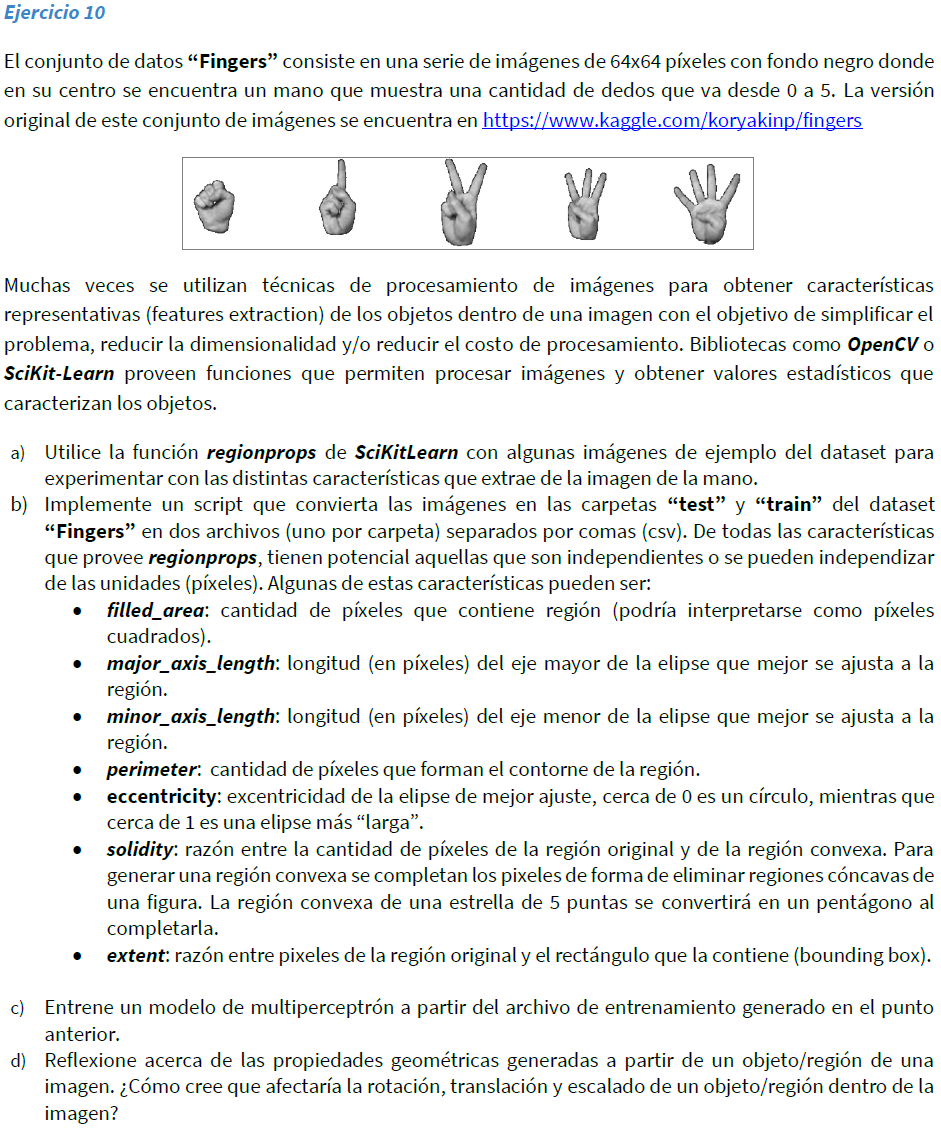

In [31]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

## Cargo el dataset que arme

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, model_selection

from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import seaborn as sns

# %% CARGA DE DATASET
nom_archivo = DATOS_DIR + 'Fingers/fingers/fingers_train.csv'
datos = pd.read_csv(nom_archivo)


# separa características y clase
X = np.array(datos.iloc[:, :-1])
Y = np.array(datos.iloc[:, -1])
nomClases = datos.iloc[:, -1].value_counts()

# Target codificado como one-hot
encoder = preprocessing.LabelEncoder()
Y_nro = encoder.fit_transform(Y)
Y_bin= to_categorical(Y_nro)

# %% --- CONJUNTOS DE ENTRENAMIENTO Y VALIDACION ---
X_train, X_val, Y_train, Y_val = model_selection.train_test_split( \
                                         X, Y_bin, test_size=0.20) #, random_state=42)

normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_val = normalizador.transform(X_val)

In [33]:
datos

,Unnamed: 0,AreaNorm,PerimNorm,RazonEjes,Excentricidad,Solidez,Extension,CantDedos
0,0,0.738394,4.735660,0.683842,0.729630,0.884906,0.668091,0.0
1,1,0.735083,4.530651,0.644182,0.764873,0.895489,0.661667,0.0
2,2,0.640701,5.137056,0.439507,0.898239,0.737976,0.583097,2.0
3,3,0.691368,5.373710,0.782715,0.622380,0.823265,0.595814,0.0
4,4,0.538321,6.421632,0.700133,0.714012,0.567008,0.344795,5.0
...,...,...,...,...,...,...,...,...
17995,17995,0.742752,4.480328,0.637980,0.770053,0.904940,0.671667,0.0
17996,17996,0.571901,6.555102,0.634564,0.772870,0.620354,0.455491,4.0
17997,17997,0.751199,4.446970,0.701397,0.712771,0.912508,0.681546,0.0
17998,17998,0.621504,4.954017,0.478766,0.877942,0.697943,0.582355,2.0


## Construyo modelo

In [34]:
ENTRADAS = X_train.shape[1]
SALIDAS = Y_train.shape[1]
OCULTAS = 8
EPOCAS = 200
LOTES = 32
PACIENCIA = 5
ACTIVACION = 'tanh'
OPTIMIZADOR = 'adam'


# %% CONSTRUCCION DEL MODELO
model = Sequential()
model.add(Dense(OCULTAS, input_shape=[ENTRADAS], activation=ACTIVACION))
model.add(Dense(SALIDAS, activation='softmax'))
model.summary()  #-- muestra la cantidad de parámetros de la red


model.compile(optimizer=OPTIMIZADOR, loss='categorical_crossentropy', metrics=['accuracy'])

# %% ENTRENAMIENTO

# parada temprana para evitar el sobreajuste
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True)

# entrena el modelo y guarda la historira del progreso
history = model.fit(X_train,Y_train, epochs=EPOCAS, batch_size=LOTES, validation_data = (X_val, Y_val), callbacks=[early_stop])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118 (472.00 B)

 Trainable params: 118 (472.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.4779 - loss: 1.3586 - val_accuracy: 0.7581 - val_loss: 0.7453
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.7766 - loss: 0.6764 - val_accuracy: 0.8631 - val_loss: 0.5197
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8703 - loss: 0.4877 - val_accuracy: 0.9064 - val_loss: 0.3920
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9121 - loss: 0.3743 - val_accuracy: 0.9417 - val_loss: 0.3031
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9429 - loss: 0.2820 - val_accuracy: 0.9539 - val_loss: 0.2363
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9601 - loss: 0.2179 - val_accuracy: 0.9617 - val_loss: 0.1880
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9681 - loss: 0.1743 - val_accuracy: 0.9656 - val_loss: 0.1548
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.9721 - loss: 0

## Metricas y graficos

450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step

 -------------------------------------------------------------------------------- 

Porcentaje de aciertos X_train : 99.625%
Reporte de métricas de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2399
           1       1.00      1.00      1.00      2393
           2       0.99      0.99      0.99      2398
           3       0.99      0.99      0.99      2377
           4       1.00      1.00      1.00      2457
           5       1.00      1.00      1.00      2376

    accuracy                           1.00     14400
   macro avg       1.00      1.00      1.00     14400
weighted avg       1.00      1.00      1.00     14400

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step

 -------------------------------------------------------------------------------- 

Porcentaje de aciertos X_val : 99.472%
Reporte de métricas de validación:
              precision    recall  f1-score   su

<Axes: >

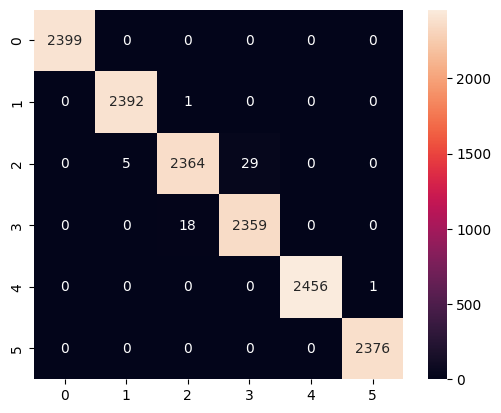

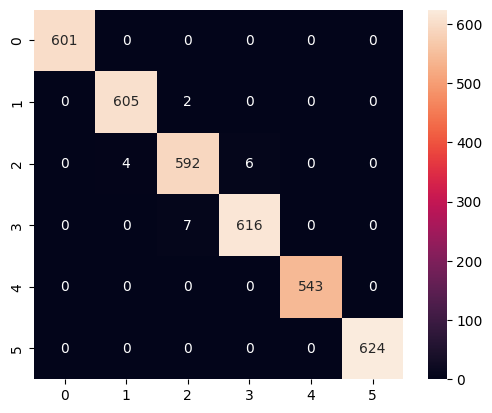

In [35]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- "conversión a entero"

Y_true = np.argmax(Y_train,axis=1)
print('\n','-'*80, '\n')
print("Porcentaje de aciertos X_train : %.3f%%" % (100*metrics.accuracy_score(Y_true, Y_pred_nro)))

report = metrics.classification_report(Y_true, Y_pred_nro)
print("Reporte de métricas de entrenamiento:\n%s" % report)
cm = metrics.confusion_matrix(Y_true, Y_pred_nro)

plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

# %% --- VALIDACION ---
Y_pred = model.predict(X_val)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- conversión a entero

Y_true = np.argmax(Y_val,axis=1)
print('\n','-'*80, '\n')
print("Porcentaje de aciertos X_val : %.3f%%" % (100*metrics.accuracy_score(Y_true, Y_pred_nro)))

report = metrics.classification_report(Y_true, Y_pred_nro)
print("Reporte de métricas de validación:\n%s" % report)

cm = metrics.confusion_matrix(Y_true, Y_pred_nro)
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')

## Graficos con evolucion de curvas de accuracy y loss

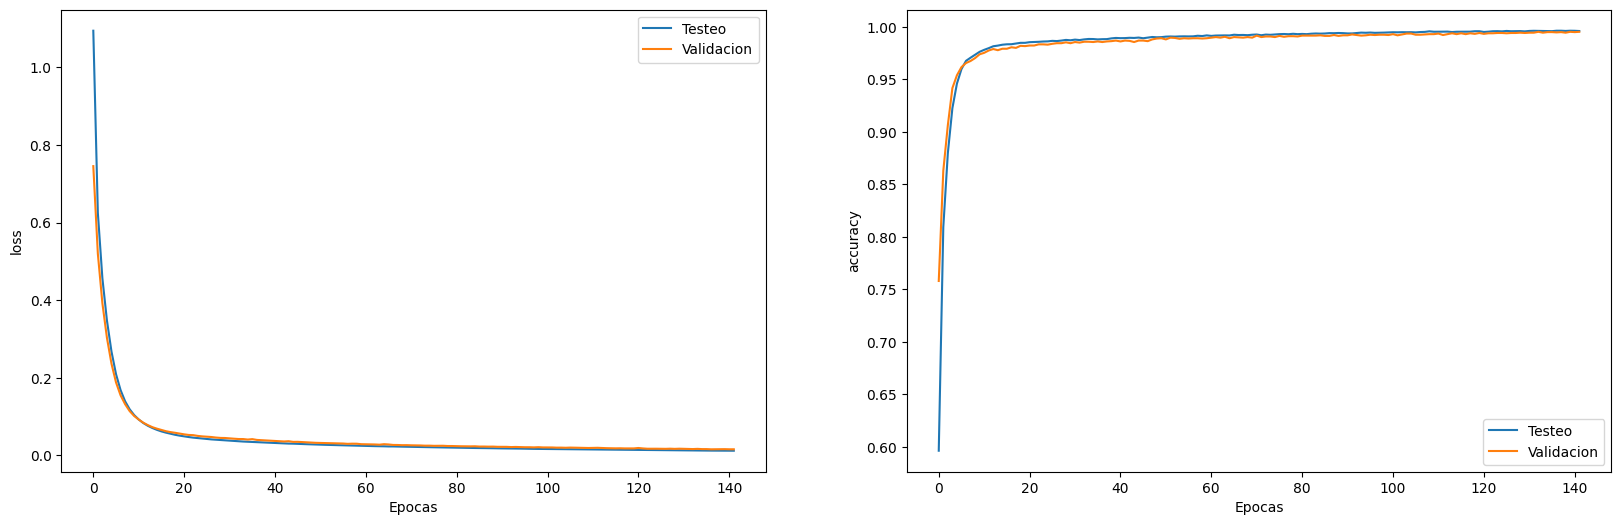

In [39]:
hist = history.history

def dibujar_curva(axs, value, epocas, hist):
    axs.plot(epocas, hist[value], label='Testeo')
    axs.plot(history.epoch, hist['val_'+value], label = 'Validacion')

    axs.set(xlabel="Epocas", ylabel=value)
    axs.legend()

fig, axs = plt.subplots(1,2, figsize=(20,6))

dibujar_curva(axs[0], 'loss', history.epoch, hist)
dibujar_curva(axs[1], 'accuracy', history.epoch, hist)

# **Pruebo en el dataset de test**

In [36]:
# %% CARGA DE DATASET
nom_archivo = DATOS_DIR + 'Fingers/fingers/fingers_test.csv'
datos = pd.read_csv(nom_archivo)


# separa características y clase
X_test = np.array(datos.iloc[:, :-1])
Y_test = np.array(datos.iloc[:, -1])
nomClases = datos.iloc[:, -1].value_counts()

# Target codificado como one-hot
Y_nro = encoder.transform(Y_test)
Y_bin= to_categorical(Y_nro)



X_test = normalizador.transform(X_test)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step

 -------------------------------------------------------------------------------- 

Porcentaje de aciertos X_test : 99.667%
Reporte de métricas de test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       0.99      0.99      0.99       600
           3       0.99      0.99      0.99       600
           4       1.00      1.00      1.00       600
           5       1.00      1.00      1.00       600

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



<Axes: >

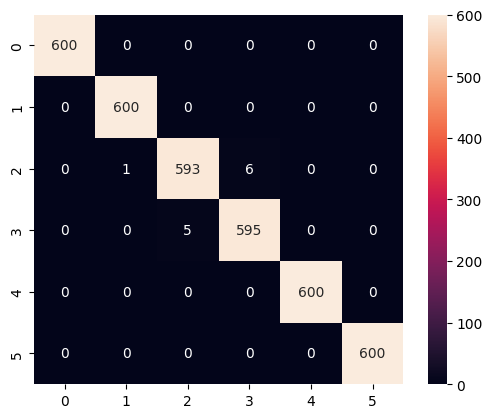

In [38]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)
Y_pred_nro = np.argmax(Y_pred,axis=1)  #-- "conversión a entero"

Y_true = Y_nro
print('\n','-'*80, '\n')
print("Porcentaje de aciertos X_test : %.3f%%" % (100*metrics.accuracy_score(Y_true, Y_pred_nro)))

report = metrics.classification_report(Y_true, Y_pred_nro)
print("Reporte de métricas de test:\n%s" % report)
cm = metrics.confusion_matrix(Y_true, Y_pred_nro)

plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')
